In [56]:
import math as math
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [13]:
df = pd.read_csv('data/Advertising.csv', index_col=0)
df.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [14]:
df.tail(5)

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [16]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Figure size 864x576 with 0 Axes>

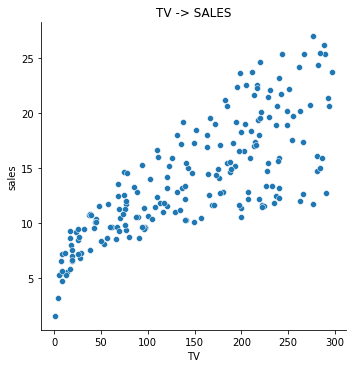

<Figure size 864x576 with 0 Axes>

In [17]:
# First glance at the relation between input and output

x = df['TV']
y = df['sales']

sns.relplot(x="TV", y="sales", data=df)

plt.title('TV -> SALES')
plt.figure(figsize=(12,8))

In [18]:
lr = LinearRegression()

In [28]:
# Reshape data for LR
x.shape
y.shape

(200,)

In [32]:
x = x.values.reshape(-1, 1)

In [36]:
y = y.values.reshape(-1, 1)

In [37]:
x.shape
y.shape

(200, 1)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)

In [40]:
# Fit 

lrModel = lr.fit(x_train, y_train)

In [41]:
print(lrModel.intercept_)
print(lrModel.coef_)

[6.80395609]
[[0.04857649]]


In [42]:
y_predicted = lrModel.predict(x_test)
y_predicted

array([[15.3096997 ],
       [ 8.10580605],
       [16.64069556],
       [17.04388043],
       [19.57471562],
       [11.54016398],
       [15.12510903],
       [10.51520002],
       [14.1632945 ],
       [ 8.02322602],
       [ 8.59642861],
       [ 8.97532524],
       [14.98423721],
       [19.70587215],
       [18.42831043],
       [ 9.53395489],
       [15.33884559],
       [ 9.69911496],
       [17.33533938],
       [ 8.72272749],
       [17.48106885],
       [ 7.75605532],
       [20.92514208],
       [14.08071447],
       [16.08692356],
       [10.01486216],
       [18.37487629],
       [15.07167489],
       [13.74553668],
       [14.79478889],
       [18.61775875],
       [17.98140671],
       [19.21039194],
       [14.07585682],
       [12.68171152],
       [10.46176588],
       [13.17233408],
       [20.61425253],
       [15.5865857 ],
       [18.8897871 ],
       [15.78574931],
       [17.60736773],
       [ 8.89274521],
       [13.57066131],
       [20.2547865 ],
       [13

Text(0, 0.5, 'Sales')

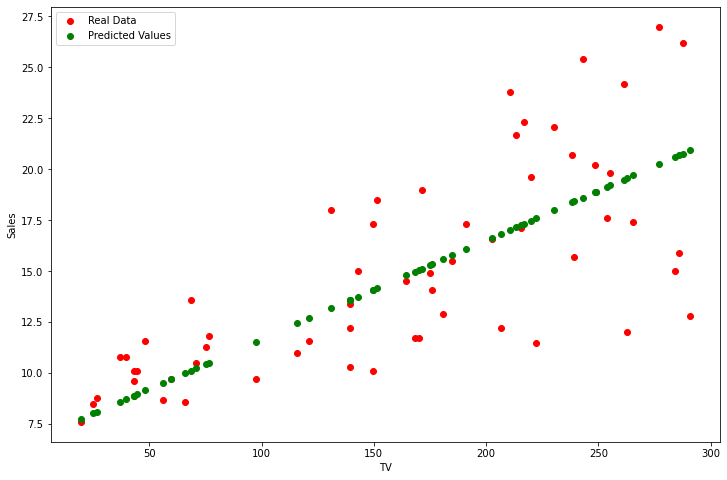

In [43]:
# Real Data vs Test Data: A Visual Comparison

fig, axs = plt.subplots(figsize=(12, 8))
axs.scatter(x_test, y_test, label="Real Data", color="red")
axs.scatter(x_test, y_predicted, label="Predicted Values", color="green")

fig.suptitle="Real Data vs Predicted Values"
axs.legend(loc="upper left")

plt.xlabel("TV")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

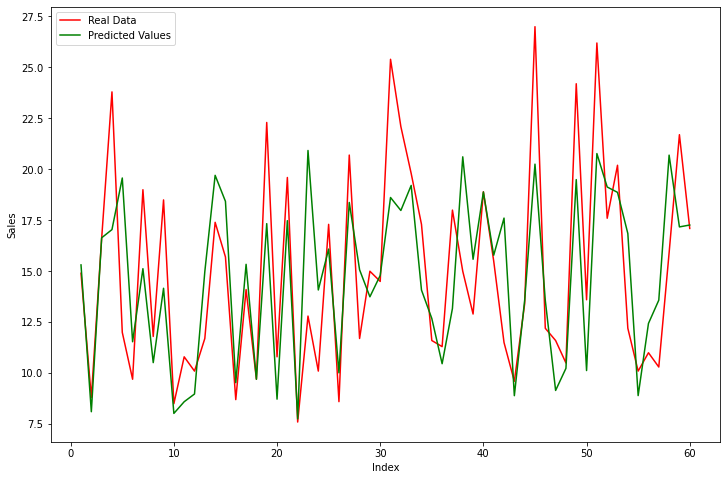

In [44]:
# Point Wise Comparison

indexes = range(1, 61)

fig, axs = plt.subplots(figsize=(12, 8))
axs.plot(indexes, y_test, color="red", label="Real Data")
axs.plot(indexes, y_predicted, color="green", label="Predicted Values")

fig.suptitle="Comparison By Each Index"

plt.legend(loc="upper left")
plt.xlabel("Index")
plt.ylabel("Sales")

Text(0, 0.5, 'residual')

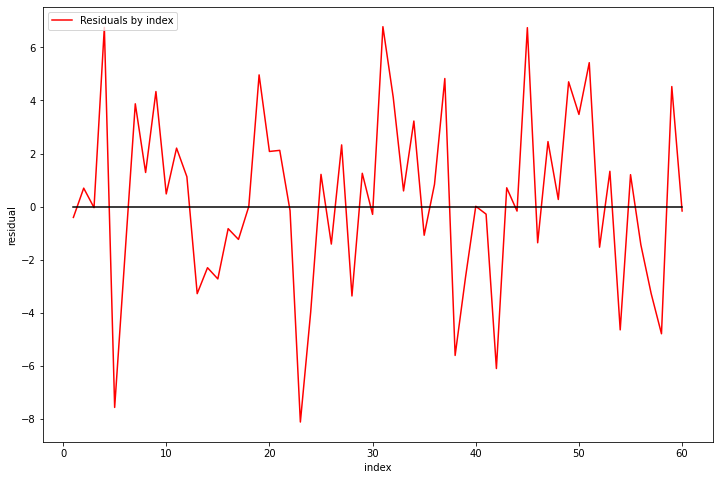

In [49]:
# Residuals for each sample 

indexes = range(1, 61)

# Plot Residuals

fig, axs = plt.subplots(figsize=(12, 8))
axs.plot(indexes, y_test - y_predicted, color="red", label="Residuals by index")

# Zero Line To Observe Residuals Better

axs.plot(indexes, np.zeros(60), color="black")

plt.legend(loc="upper left")
plt.xlabel("index")
plt.ylabel("residual")

In [60]:
# A Glance At Our Model's Performance

from sklearn.metrics import r2_score, mean_squared_error


3.3862904384880803

In [61]:
# R^2

r_2 = r2_score(y_test, y_predicted)
r_2

0.5299030898659625

In [62]:
# MSE

MSE = mean_squared_error(y_test, y_predicted)
MSE

11.466962933795795

In [63]:
# RMSE 

RMSE = math.sqrt(MSE)
RMSE

3.3862904384880803

So, What Metrics Say About Our Model ? 

R² = %52.99

That almost makes a %53 probability of success for predicting real world data or in other words, our model represents %53 of our data.

We can say not bad but at the same time not that good ? 


RMSE
